# <center>Block 5: One-dimensional optimal transport</center>
### <center>Alfred Galichon (NYU)</center>
## <center>`math+econ+code' masterclass on matching models, optimal transport and applications</center>
<center>© 2018-2020 by Alfred Galichon. Support from NSF grant DMS-1716489 is acknowledged. Julie Lenoir and James Nesbit contributed.</center>

## Optimal transport I: One-dimensional matching


### Learning Objectives

* Copulas and comonotonicity

* Positive Assortative Matching

* The Wage Equation

### References

* [OTME], Ch. 4 and App. C

* Complements:

     * Becker (1973). A Theory of Marriage: Part I. *JPE*.

     * Sattinger (1993). Assignment Models of the Distribution of Earnings. *JEL*.

     * Gabaix and Landier (2008). Why has CEO Pay Increased So Much? *QJE*.

     * Tervi0 (2008). The Difference That CEOs Make: An Assignment Model Approach. *AER*.


## Motivation

Today we shall study one-dimensional models of matching. The application we shall envision is to the literature on CEO compensation: talented CEOs arguably generate more output if they run large firms than if they run a small business. Hence in these models, the CEO's talent is leveraged by the firm size.

The output of a match is CEO's talent multiplied by a term capturing the firm's size. This surplus function belongs to a class which leads to positive assortative matching: the optimal matching will consists of assigning the most talented CEO with the biggest firm, etc.

The model we shall follows a literature in family economics, see Becker (1973), and labor economics: Sattinger (1993), Tervio (2008), Gabaix and Landier (2008). Our application will be based on Gabaix and Landier's CEO compensation data. The difference with the empirical literature on marriage is that one observes typically less relevant characteristics on CEOs, but we observe the transfers, which are typically not observed whithin the couple.

## Data

For each firm, we observe the size of the firm (market cap) and the compensation.

Distribution of CEO talent (to be defined later) is calibrated in their paper and we will take it as given; so will be the production function.

Our exercise will consist of predicting the CEO compensation. (Actually GL do the opposite: they use the distribution of wages to calibrate the production function).

In [1]:
# import gurobipy as grb
import pandas as pd
import numpy as np
# import scipy.sparse as sparse
import os

In [2]:
thepath = os.path.join(os.getcwd(),'..')
data = pd.read_csv(os.path.join(thepath, "data_mec_optim/wages_gabaix-landier/data_Gabaix_Landier.csv"))

In [3]:
data.head()

,yeara,mktcap,nFIRM,comp,nCEO
0,2000,17522.963,333.0,22024.6190,74.0
1,1991,19737.494,129.0,NaN,NaN
2,1992,23442.229,107.0,NaN,NaN
3,1993,23647.432,118.0,NaN,NaN
4,1994,22099.512,126.0,5147.5156,175.0


## Positive assortative matching

Assume $\mathcal{X}=\mathcal{Y}=\mathbb{R}$. This implies that both workers and firms are characterized by scalar characteristics $x$ and $y$. Restrictive, but most of the applied literature in Economics to this day has 
focused on this case, which already generates interesting economic insights.

Assume that there is the same number of workers and firms, and this number is normalized to one. Let $P$ be the probability distribution of the workers types $x$, and $Q$ the probability distribution of the firms types $y$.

E.g. the literature on CEO compensation studies the matching problem of firms and managers: each manager has\ a measure of talent $x\in\mathbb{R}_{+}$ (extra return generated), and each firm has market capitalization $y\in\mathbb{R}_{+}$. Then, the economic value generated by a manager of talent $x$ running a firm of size $y$ is $\Phi\left(  x,y\right)  =xy$. Assume manager of talent $x$ is assigned to firm of size $y=T\left(x\right)  $. The constraint on the assignment map $T$ is that $T\#P=Q$, which means that each firm is run by a manager and each manager runs a firm. Then the total value created is

\begin{align*}
\mathbb{E}_{P}\left[  \Phi\left(  X,T\left(  X\right)  \right)  \right]
=\mathbb{E}\left[  XT\left(  X\right)  \right]  .
\end{align*}

Under a natural assuption on $\Phi$, called \emph{supermodularity}, we will see that the optimal coupling is such that $Y=T\left(  X\right)  $, where $T$ is nondecreasing. $T$ will be given an explicit characterization.

## Copulas

Recall that given a probability distribution $P$ on the real line, one can define the \emph{quantile} of that distribution, denoted $F_{P}^{-1}$, which is a map from $\left[  0,1\right]  $ to $R$, nondecreasing and continuous from the right, and such that if $U\sim\mathcal{U}:=\mathcal{U} \left(\left[0,1\right]\right)$, then

<a name="quantileRep"></a>
\begin{align*}
F_{P}^{-1}\left(  U\right)  \sim P.
\end{align*}

$F_{P}^{-1}$ is the generalized inverse of the c.d.f. of $P$, $F_{P}$, the proper inverse when $P$ has a positive density, in which case $U=F_{P}\left(X\right)  $. Note also that if $X\sim P$, then $F_{P}\left(  X\right)  $ has a uniform distribution if and only if $P$ has no mass point.

[Quantile representation](#quantileRep) extends to the case of bivariate distributions: for $\pi\in\mathcal{M}\left(  P,Q\right)  $, there exists a pair $\left(  U,V\right)  $ of uniform random variables such that

<a name="Bi-quantileRep"></a>
\begin{align*}
\left(  F_{P}^{-1}\left(  U\right)  ,F_{Q}^{-1}\left(  V\right)  \right)
\sim\pi,
\end{align*}

and the c.d.f. associated with the distribution of $\left(  U,V\right)  $ is called the *copula* associated with distribution $\pi$.

## Comonotonicity

A pair of random variables $\left(  X,Y\right)$ is *comonotone* if there is $U\sim\mathcal{U}$ such that $X=F_{P}^{-1}\left(  U\right)$ and $Y=F_{Q}^{-1}\left(  U\right)  $. Equivalently, $X$ and $Y$ are said to exhibit *Positive Assortative Matching (PAM)*.

The copula associated with a pair of comonotone random variables is the c.d.f. associated with $\left(  U,U\right)  $, which is $F\left(  u,v\right) =\min\left(  u,v\right)  $. This copula is called the *upper Fréchet-Hoeffding copula*.

Note that when the cdf of $X$ is continuous, there is a much simpler equivalent statement of comonotonicity:

---
**Lemma**
If the distribution of $X$ has no mass points, then $X$ and $Y$ are comonotone if and only if there exists a nondecreasing map $T$ such that $Y=T\left(  X\right)  $. Moreover, one can choose $T\left(x\right)  =F_{Q}^{-1}\left(  F_{P}\left(  x\right)  \right).$

---

---
**Proof**

Consider $U\sim\mathcal{U}$ such that $X=F_{P}^{-1}\left(  U\right)  $ and $Y=F_{Q}^{-1}\left(  U\right)  $. If the distribution of $X$ has no mass point, then $U=F_{P}\left(  X\right)  $. Hence, $Y=F_{Q}^{-1}\left(F_{P}\left(  X\right)  \right)  $.

---

### Supermodular surplus

Assume $\Phi$ is \emph{supermodular}, that is, for every scalars $x$, $x^{\prime}$, $y$ and $y^{\prime}$,

<a name="supermodularPhi"></a>
\begin{align*}
\Phi\left(  x\vee x^{\prime},y\vee y^{\prime}\right)  +\Phi\left(  x\wedge
x^{\prime},y\wedge y^{\prime}\right)  \geq\Phi\left(  x,y\right)  +\Phi\left(
x^{\prime},y^{\prime}\right)  , \label{supermodularPhi}%
\end{align*}

where $x\vee x^{\prime}$ and $x\wedge x^{\prime}$ denote respectively the maximum and the minimum between scalars $x$ and $x^{\prime}$. When $\Phi$ is twice continuously differentiable (which we will assume from now on), this is equivalent to

\begin{align*}
\frac{\partial^{2}\Phi\left(  x,y\right)  }{\partial x\partial y}\geq0.
\label{SupermodDiff}%
\end{align*}

Assume that there are two types of workers $\mathcal{X=}\left\{\underline{x},\overline{x}\right\}  $ and firms $\mathcal{Y=}\left\{  \underline{y},\overline{y}\right\}  $. An equivalent restatement of the [supermodular condition](#supermodularPhi) is then

<a name="PAMequiv"></a>
\begin{align*}
\overline{x}\geq \underline{x} \text{ and }\overline{y}\geq \underline{y} \text{ implies }\Phi\left(
\overline{x},\overline{y}\right)  +\Phi\left(  \underline{x},\underline{y}\right)
\geq\Phi\left(  \overline{x},\underline{y}\right)  +\Phi\left(  \underline{x},\overline
{y}\right)  \label{PAMequiv}%
\end{align*}

which asserts that the total output created is higher if the high types match together and the low types match together (assortative matching) rather than if mixed high/low pairs are formed.

The following examples of surplus functions are supermodular:

1. Cobb-Douglas function: $\Phi\left(  x,y\right)  =x^{a}y^{b}$ ($x,y\geq 0$), with $a,b\geq 0$,

2. General multiplicative form: $\Phi\left(  x,y\right)  =\zeta\left(x\right)  \xi\left(  y\right)  $ with $\zeta$ and $\xi$ nondecreasing,

3. Leontieff: $\Phi\left(  x,y\right)  =\min\left(  x,y\right)$,

4. C.E.S. function: $\Phi\left(  x,y\right)  =\left(  x^{-\rho}+y^{-\rho}\right)  ^{-1/\rho}$, $\rho\geq 0$,

5. $\Phi\left(  x,y\right)  =\phi\left(  x-y\right)  $ where $\phi$ is concave; in particular, $\Phi\left(  x,y\right)  =-\left\vert x-y\right\vert ^{p}$, $p\geq1$ or $\Phi\left(  x,y\right)  =-\left(  x-y-k\right)  ^{+}$,

6. $\Phi\left(  x,y\right)  =\phi\left(  x+y\right)  $, where $\phi$ convex.

## Rearrangement theorem

---
**Theorem**
<a name="thm:MKsupermod"></a>
1. Assume that $\Phi$ is supermodular. Then the primal of the Monge-Kantorovich problem

    <a name="mkpb1d"></a>
    \begin{align*}
    \sup_{\pi\in\mathcal{M}\left(  P,Q\right)  }\mathbb{E}_{\pi}\left[
    \Phi\left(  X,Y\right)  \right]
    \end{align*}

    has a comonotone solution.

2. Conversely, if [MK primal](#mkpb1d) has a comonotone solution for any choice of probability distributions $P$ and $Q$ on the real line, then $\Phi$ is supermodular.

3. If, in addition, $P$ has no mass points, then there is an optimal assignment which is is pure and satisfies $Y=T\left(  X\right)$ where

    <a name="mongeMap1d"></a>
    \begin{align*}
    T\left(  x\right)  =F_{Q}^{-1}\circ F_{P}\left(  x\right).
    \end{align*}

---
The proof of part 1. is based on the following lemma.

---
<a name="lem:comonotone"></a>
**Lemma**

Let $Z_{1}$ and $Z_{2}$ be two Bernoulli random variables of respective success probability $p_{1}$ and $p_{2}$. Then $\mathbb{E}\left[  Z_{1}Z_{2}\right]  \leq\min\left(  p_{1},p_{2}\right)$.

---
---
**Proof**

As $Z_{2}\leq1$, $\mathbb{E}\left[  Z_{1}Z_{2}\right]  \leq\mathbb{E}\left[Z_{1}\right]  =p_{1}$. Similarly $\mathbb{E}\left[  Z_{1}Z_{2}\right]\leq\mathbb{E}\left[  Z_{2}\right]  =p_{2}$. Thus, $\mathbb{E}\left[Z_{1}Z_{2}\right]  \leq\min\left(  p_{1},p_{2}\right)$.

---

We are now ready to sketch the proof of the [Rearrangement Theorem](#thm:MKsupermod).

---
**Proof**

1. Take $U\sim\mathcal{U}$,and $X=F_{P}^{-1}\left(  U\right)  $ and $Y=F_{Q}^{-1}\left(  U\right)$. By the [quantile representation](#quantileRep), $X\sim P$ and $Y\sim Q$ and $\left(  X,Y\right)$ is comonotone by definition. The proof is in three steps.

    **Step 1.** For $a,b\in\mathbb{R}$, consider surplus function $\phi_{ab}\left(x,y\right)  :=1\left\{  x\geq a\right\}  1\left\{  y\geq b\right\}$, and let $Z_{1}=1\left\{  X\geq a\right\}  $ and $Z_{2}=1\left\{  Y\geq b\right\}$. $Z_{1}$ and $Z_{2}$ are two Bernoulli random variables of respective success probability $p_{1}=1-F_{P}\left(  a\right)  $ and $p_{2}=1-F_{Q}\left(b\right)  $, thus $\mathbb{E}\left[  Z_{1}Z_{2}\right]  \leq\min\left(p_{1},p_{2}\right)  $, but a straightforward calculation shows that the inequality actually holds as an equality. Hence $\left(  X,Y\right)$, which is comonotone, is optimal for each surplus function $\phi_{ab}$.

    **Step 2.** Assume $\mathcal{X}=\left[\underline{x},\overline{x}\right]$ and $\mathcal{Y} = \left[ \underline{y}, \overline{y}\right]$ are compact intervals. Then

    \begin{align*}
F\left(  x,y\right)  =\frac{\Phi\left(  x,y\right)  -\Phi\left(  \underline{x},y\right)  -\Phi\left(  x,\underline{y}\right)  +\Phi\left(  \underline{x},\underline{y}\right)  }{\Phi\left(  \overline{x},\overline{y}\right)  -\Phi\left(\underline{x},\overline{y}\right)  -\Phi\left(  \overline{x},\underline{y}\right)+\Phi\left(  \underline{x},\underline{y}\right)  }
    \end{align*}

    is a c.d.f. associated to a probability measure $\zeta$, and hence 

    \begin{align*}
F\left(x,y\right) = \int\phi_{ab}\left(  x,y\right)  d\zeta\left(  a,b\right)$.
    \end{align*}
    
    As a result, if $\pi\in\mathcal{M}\left(  p,q\right)$ is the distribution of $\left(  X,Y\right)  $ where $X$ and $Y$ are comonotone, then
    
    \begin{align*}
\int F\left(  x,y\right)  d\pi\left(  x,y\right)  \geq\int F\left(
x,y\right)  d\tilde{\pi}\left(  x,y\right)
    \end{align*}
    
    for every $\tilde{\pi}\in\mathcal{M}\left(  p,q\right)  $. But as $F$ is of the form $F\left(  x,y\right)  =K\Phi\left(  x,y\right)  +f\left(  x\right) +g\left(  y\right)  +c$ with $K>0$, and because $\int\left\{  f\left(x\right)  +g\left(  y\right)  +c\right\}  d\pi\left(  x,y\right)=\int\left\{  f\left(  x\right)  +g\left(  y\right)  +c\right\}  d\tilde{\pi}\left(  x,y\right)  $ for every $\tilde{\pi}\in\mathcal{M}\left(  p,q\right) $, it results that
    
    \begin{align*}
\int\Phi\left(  x,y\right)  d\pi\left(  x,y\right)  \geq\int\Phi\left(x,y\right)  d\tilde{\pi}\left(  x,y\right)  ~\forall\tilde{\pi}\in \mathcal{M}\left(  p,q\right)
    \end{align*}
    which completes step 2.
    
    **Step 3.** When $\mathcal{X}$ and $\mathcal{Y}$ are the real line, the result still holds by approximation.

2. The converse follows by taking for $P$ the discrete probability with two mass points \b{x} and $\overline{x}$ with probability 1/2 each, and $Q$ the discrete probability with two mass points \b{y} and $\overline{y}$ also each with probability 1/2. Then if [MK primal](#mkpb1d) has a solution such that $F_{P}^{-1}\left(  U\right)  $ and $Y=F_{Q}^{-1}\left(  U\right)  $, for $U\sim\mathcal{U}\left(  \left[  0,1\right]  \right)  $, it follows that [condition](#PAMequiv) holds.

3. follows from (i) and [Lemma](#lem:comonotone).

---


Note that the assumptions made in the [Rearrangement Theorem](#thm:MKsupermod) do not guarantee that all the optimal assignments are comonotone. Indeed, the trivial example where $\Phi\left(  x,y\right)  =0$ for every $x$ and $y$ provides an example of supermodular surplus function, for which any assignment is optimal. For this reason, we provide a strengthening of the previous result, which ensures uniqueness. We will assume $\Phi$ is strictly supermodular, that is if both $\overline{x}>\underline{x}$ and $\overline{y}>\underline{y}$ hold, then $\Phi\left(\overline{x},\overline{y}\right)  +\Phi\left(\underline{x},\underline{y}\right)  >\Phi\left(\overline{x},\underline{y}\right)  +\Phi\left( \underline{x},\overline{y}\right)$.

---
**Theorem**

Assume that $\Phi$ is strictly supermodular, and $P$ has no mass point. Then the primal [Monge-Kantorovich problem](#mkpb1d) has a unique optimal assignment, and this assignment is characterized by $Y=T\left(  X\right)  $ where $T$ is given by [this](#mongeMap1d).

---


### The wage equation

Assume $\left(u,v\right)$ is a solution to the dual of the Monge-Kantorovich problem

<a name="mkdual1d"></a>
\begin{align}
\inf \,&  \mathbb{E}_{P}\left[  u\left(  X\right)  \right]  +\mathbb{E}_{Q}\left[  v\left(  Y\right)  \right] \\
s.t.~  &  u\left(  x\right)  +v\left(  y\right)  \geq\Phi\left(  x,y\right)
\end{align}

Then $v\left(y\right)$ is interpreted as the value of the problem of a firm of type $y$, choosing the optimal worker $x$. Then the firm's program is

\begin{align*}
v\left(  y\right)  =\max_{x}\left\{  \Phi\left(  x,y\right)  -u\left(
x\right)  \right\}
\end{align*}

thus by first order conditions, one is led to the *wage equation*

<a name="WageEq"></a>
\begin{align*}
u^{\prime}\left(  x\right)  =\frac{\partial\Phi}{\partial x}\left(  x,T\left(
x\right)  \right)  , \label{WageEq}%
\end{align*}
where $T$ is given by [this](#mongeMap1d).

---
**Theorem**

1. Assume $\Phi$ is supermodular and continuously differentiable with respect to its first variable. Assume $P$ has no mass point. Then the [dual Monge-Kantorovich problem](#mkdual1d) has a solution $\left(u,v\right)$. Further, $u$ solves the [wage equation](#WageEq). Hence, $u$ is determined up to a constant $c$ by

    \begin{align*}
    u\left(  x\right)  =c+\int_{x_{0}}^{x}\frac{\partial\Phi}{\partial x}\left(t,T\left(  t\right)  \right)  dt. 
    \end{align*}

2. Assume further that $Q$ has no mass point, and that $\Phi$ is also continuously differentiable with respect to its second variable. Then $v$ is given by

    \begin{align*}
    v\left(  y\right)  =c^{\prime}+\int_{T\left(  x_{0}\right)  }^{y}\frac{\partial\Phi}{\partial y}\left(  T^{-1}\left(  z\right)  ,z\right)  dz,
    \end{align*}

    where $c$ and $c^{\prime}$ are related by $c+c^{\prime}=\Phi\left(x_{0},T\left(  x_{0}\right)  \right).$

---

### Interpretation: imperfect competition and rents

It is important to distinguish between $\partial\Phi\left(  x,T\left(x\right)  \right)  /\partial x$, which is the partial derivative of $\Phi\left(  x,y\right)  $ applied at $\left(  x,y\right)  =\left(  x,T\left(x\right)  \right)  $, and $d\Phi\left(  x,T\left(  x\right)  \right)  /dx$,which is the total derivative of $\Phi\left(  x,T\left(  x\right)  \right)$ with respect to $x$. One has

\begin{align*}
\frac{d\Phi\left(  x,T\left(  x\right)  \right)  }{dx}=\frac{\partial \Phi\left(  x,T\left(  x\right)  \right)  }{\partial x}+\frac{\partial \Phi\left(  x,T\left(  x\right)  \right)  }{\partial y}T^{\prime}\left(x\right)
\end{align*}

This decomposition has an interesting interpretation in terms of differential rent. The total derivative $d\Phi\left(  x,T\left(  x\right) \right)  /dx$ is the marginal increase in value between a firm run by a manager of talent $x$ and a firm run by a manager of talent $x+dx$. This differential value is split between the manager's differential rent ($\partial\Phi\left(  x,T\left(  x\right)  \right)  /\partial x=u^{\prime}\left(  x\right)  $) and the firm's differential rent ( $\left(  \partial \Phi\left(  x,T\left(  x\right)  \right)  /\partial y\right)  T^{\prime }\left(  x\right)  =dv\left(  T\left(  x\right)  \right)  /dx$).

This discussion highlights the nature of the assignment model, which is a model of imperfect competition. In this model, managers compete against each other, and likewise on the other side of the market. Managers are imperfect substitutes for each other. This imperfect competition is the source of the rent, as made apparent by [wage equation formula](#WageEq).

## Application

Gabaix and Landier (2008) assume that

\begin{align*}
\Phi\left(  x,y\right)  =Cxy^{\gamma}
\end{align*}

where $C$ and $\gamma$ are parameters.

If $X$ is the talent of the CEO, then the distribution of $X$ can be parameterized through its quantile by

\begin{align*}
Q_{X}\left(  t\right)  =X^{\max}-\frac{B}{\beta N}\left(  N\left(  1-t\right) \right)  ^{\beta}
\end{align*}

(such a distribution is consistent with extreme value theory). $N$ is the number of firms and $\beta$ is a parameter.

If $Y$ is the size of the firm, then its distribution is assumed to be Pareto with distribution $1/\alpha$, i.e.

\begin{align*}
Q_{Y}\left(  t\right)  =A\left(  N\left(  1-t\right)  \right)  ^{-\alpha}%
\end{align*}

(they find that $\alpha=1$, i.e. Zipf's law, fits the data quite well).

The wage of CEO indexed by $t\in\left[  0,1\right]  $ is $w\left(t\right)  $; firm $y=Q_{Y}\left(  t\right)  $'s problem is

\begin{align*}
\max_{t\in\left[  0,1\right]  }\left\{  CQ_{X}\left(  t\right)  y^{\gamma}-w\left(  t\right)  \right\}  =\max_{t\in\left[  0,1\right]  }\left\{-C\frac{B}{\beta N}\left(  N\left(  1-t\right)  \right)  ^{\beta}y^{\gamma}-w\left(  t\right)  \right\}
\end{align*}

and by FOC:

\begin{align*}
w^{\prime}\left(  t\right)   &  =BCy^{\gamma}\left(  N\left(  1-t\right)
\right)  ^{\beta-1}\\
&  =A^{\gamma}BC\left(  N\left(  1-t\right)  \right)  ^{-\alpha\gamma+\beta-1}%
\end{align*}

where it is assumed $\alpha\gamma>\beta$. When $N$ is large, this yields

\begin{align*}
w\left(  t\right)  \approx\frac{A^{\gamma}BC}{\alpha\gamma-\beta}\left(N\left(  1-t\right)  \right)  ^{-\alpha\gamma+\beta}
\end{align*}

"Superstar" effect (Rosen, 1981): if $\beta>0$, then the wages are unbounded, even though talent is bounded -- talent is very valuable at the top end of the distribution.

We shall use Gabaix-Landier's calibrated values
\begin{align*}
\beta\simeq2/3,\gamma\simeq1,BC=2.8\ast10^{-6}
\end{align*}

In [4]:
β = 2/3
B = 1
C = 2.8e-06
α = γ = 1
X_max = 0

We will focus on data from year 2003.

In [5]:
year = 2003
data2003 = data[data['yeara'] == 2003]

We will normalize compensation to insure compensation and mktcap are in the same order of magnitude. We need to get rid of the `NA`'s in the data (separately for compensation and market cap) and sort in decreasing order.

In [6]:
comp = data2003['comp']/1000  # insures same order of magnitude
comp = comp[comp.notnull()].sort_values(ascending=False)

mktcap = data2003['mktcap']
mktcap = mktcap[mktcap.notnull()].sort_values(ascending=False)

In [31]:
N=mktcap.size
n= np.arange(1,N + 1)

So in order compute the wage function, it remains to find the value of $A$. This will simply be a regression of $\log(S)$ on $n$. Regress firm rank against mktcap:

In [33]:
import statsmodels.api as sm
n = np.log(n)
n = sm.add_constant(n)
model = sm.OLS(np.log(mktcap), n).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mktcap   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.574e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:01:26   Log-Likelihood:                 380.55
No. Observations:                 500   AIC:                            -757.1
Df Residuals:                     498   BIC:                            -748.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5140      0.028    562.058      0.000      15.460      15.568
x1            -0.9822      0.005   -189.048      0.000      -0.992      -0.972
==============================================================================
Omnibus:                      582.902   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67515.074
Skew:                          -5.276   Prob(JB):                         0.00
Kurtosis:                      58.941   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
A = np.exp(model.params[0])

We can compute the theoretical wage function and plot it against the realized wage function.

In [67]:
def wage(x):
    return ((A**γ * B * C)/(α * γ - β) * x**(-α * γ + β))

In [68]:
W = list(map(wage, range(1,N + 1)))

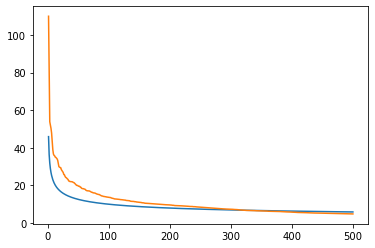

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(1, N+1), W)
plt.plot(range(1, N+1), comp)